# Car insurance claim dataset
### Daniel Navarro Quirós
### danielnavarro2911@gmail.com

#### Context

Your client is a car insurance company. They want to price their car insurance competitively, which means having a good model for customers at risk of getting into accidents.

#### Content

Each row corresponds to a customer, the outcome column records whether the customer made a claim in the previous year or not. The client has informed you that the other columns should be self-explanatory.

### Inspiration

The client is interested to know if the customer data can be used to predict the likelihood that a claim is made in the next
year. Your task is to investigate this and make a recommendation. You should complete the following tasks:

* Build a proof-of-concept model to predict the outcome column from the customer data, including any necessary data
processing
* The client is keen to be able to interpret the model you build and would be particularly interested in understanding
which features are most important to the model's decisions.

#### Dataset extracted from [Kaggle](https://www.kaggle.com/racholsan/customer-data?select=customer-data.csv)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import chart_studio.plotly as py
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from ipywidgets import interact
#from ipywidgets import *
#import cufflinks as cf
#from matplotlib import colors
#cf.go_offline()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('customer-data.csv')

In [3]:
df.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [4]:
#Converting True=1 and False=0
for i in df:
    if df[i].dtype=='bool':
        df[i]=df[i].map({True:1,False:0})

# Knowing the customers

In [5]:
columnas=df.drop('id',axis=1).columns
@interact(col=list(columnas),hue=list(columnas))
def interac(col):
    if len(df[col].unique())<=6:
        plt.figure(figsize=(10,10))
        df.groupby(col).count().reset_index()['id'].plot.pie(autopct='%1.1f%%')
        plt.title(col)
    elif 6<len(df[col].unique()) and len(df[col].unique())<20:
        plt.figure(figsize=(10,10))
        sns.countplot(data=df,x=col)
        plt.title(col)
        plt.legend(loc=1)
    else:
        plt.figure(figsize=(10,10))
        sns.displot(data=df,x=col,height=8)
        plt.title(col)
    
    

interactive(children=(Dropdown(description='col', options=('age', 'gender', 'race', 'driving_experience', 'edu…

# Some interesting facts

In [6]:
@interact(hue=['age','driving_experience','education','children','speeding_violations','DUIs','past_accidents', 'outcome'])
def acc(hue):
    plt.figure(figsize=(15,8))
    _=sns.countplot(x='past_accidents',data=df,hue=hue)
    plt.legend(loc=1)

interactive(children=(Dropdown(description='hue', options=('age', 'driving_experience', 'education', 'children…

In [7]:
df1=pd.DataFrame.copy(df)

In [8]:
df1.drop(['id','race','postal_code','annual_mileage'],axis=1,inplace=True)

In [9]:
for i in df1:
    if df1[i].dtype=='O':
        var=pd.get_dummies(df1[i],drop_first=False)
        df1.drop(i,axis=1,inplace=True)
        df1=pd.concat([df1,var],axis=1)

<AxesSubplot:title={'center':'Correlations between Outcome and all the features'}>

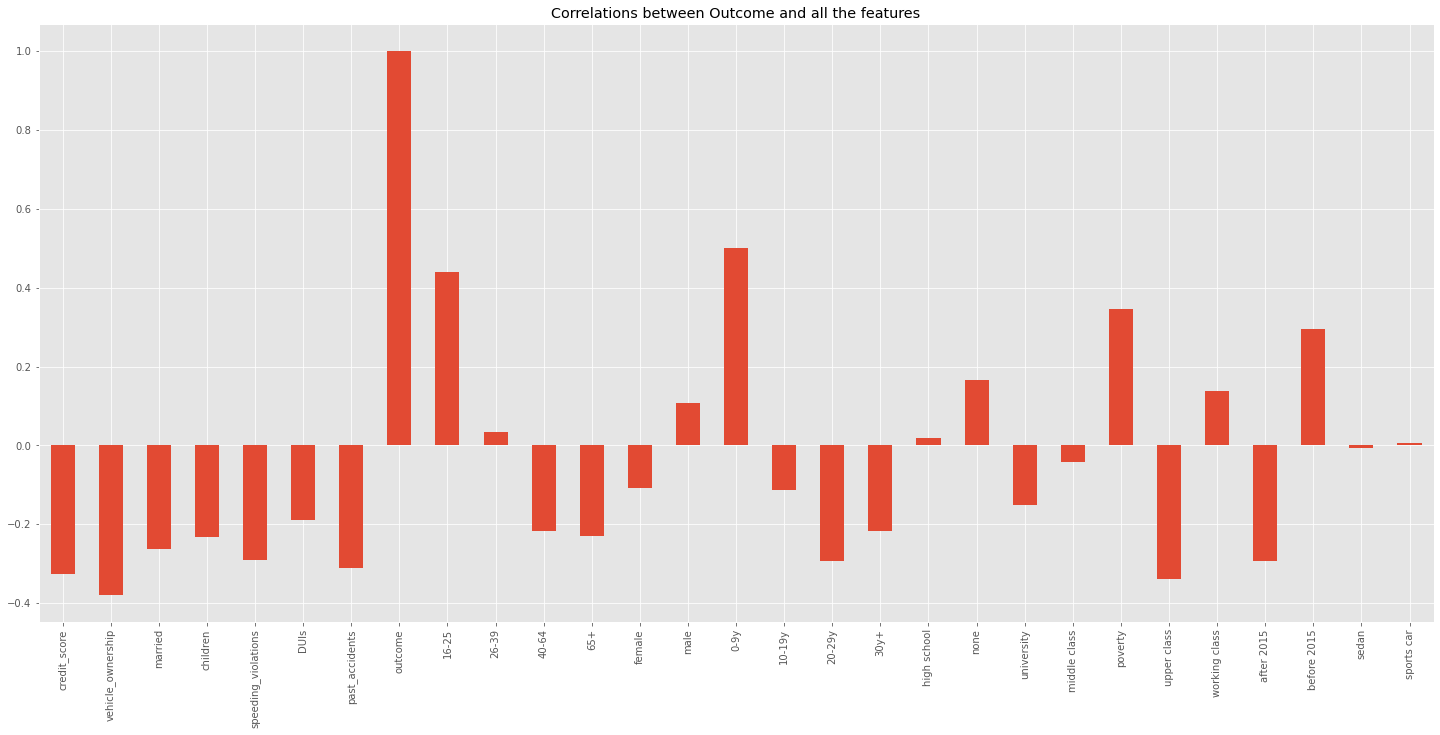

In [10]:
plt.figure(figsize=(25,11))
plt.title('Correlations between Outcome and all the features')
df1.corr()['outcome'].plot.bar()